# Task
Since I don't get the course coude yet and unable to get the exercise materials, for this VGG exercise I use gemini directly to play around with the VGGnet. 

Implement a VGG16 model for classifying the ImageNet-1k dataset using Keras, allowing for architecture modification. Load pre-trained ImageNet weights. Display the model architecture, show a sample input image and its predicted output, and visualize the channel activations of a selected layer for the sample input.

## Setup

### Subtask:
Install necessary libraries (TensorFlow, Keras, Matplotlib, etc.).


**Reasoning**:
Install the required packages for the task.



In [1]:
%pip install tensorflow keras matplotlib numpy

## Model implementation

### Subtask:
Implement the VGG16 model using Keras, ensuring the architecture can be easily modified.


**Reasoning**:
Implement the VGG16 model using Keras, allowing for architecture modification, by defining a function that constructs the model with customizable parameters.



In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_vgg16(input_shape=(224, 224, 3), num_classes=1000, include_top=True):
    """Builds the VGG16 model.

    Args:
        input_shape: Shape of the input images.
        num_classes: Number of output classes.
        include_top: Whether to include the fully-connected layer at the top of the network.

    Returns:
        A Keras Model instance.
    """
    input_tensor = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(num_classes, activation='softmax', name='predictions')(x)

    model = tf.keras.Model(inputs=input_tensor, outputs=x, name='vgg16')
    return model

# Instantiate the model
vgg16_model = build_vgg16()
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Load pre-trained weights

### Subtask:
Load pre-trained ImageNet weights for the VGG16 model.


**Reasoning**:
Import the VGG16 application from tensorflow.keras.applications and instantiate it with ImageNet weights.



In [3]:
from tensorflow.keras.applications import VGG16

# Instantiate VGG16 with ImageNet weights
imagenet_vgg16 = VGG16(weights='imagenet', include_top=True)

# Set the weights of the built model
for layer in vgg16_model.layers:
    if layer.name in [imagenet_layer.name for imagenet_layer in imagenet_vgg16.layers]:
        imagenet_layer = imagenet_vgg16.get_layer(layer.name)
        layer.set_weights(imagenet_layer.get_weights())

print("ImageNet weights loaded successfully into vgg16_model.")

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
ImageNet weights loaded successfully into vgg16_model.


## Show architecture

### Subtask:
Display the architecture of the implemented VGG16 model.


**Reasoning**:
Display the architecture of the VGG16 model using the summary() method.



In [4]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Prepare sample input

### Subtask:
Load and preprocess a sample image from the ImageNet dataset.


**Reasoning**:
Load and preprocess a sample image from the ImageNet dataset by loading the image, resizing it, converting it to a NumPy array, adding a batch dimension, and applying VGG16 preprocessing. Since there isn't a readily available ImageNet dataset file in the provided environment, I will download a sample image from a public URL for demonstration purposes.



In [5]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.applications.vgg16 import preprocess_input

# Choose a sample image URL
image_url = "https://images.pexels.com/photos/126407/pexels-photo-126407.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"

# Download the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Resize the image to the target input size (224x224 pixels)
target_size = (224, 224)
image = image.resize(target_size)

# Convert the image to a NumPy array
image_array = np.array(image)

# Expand the dimensions of the array to include a batch dimension
image_array = np.expand_dims(image_array, axis=0)

# Preprocess the image data according to VGG16 requirements
preprocessed_image = preprocess_input(image_array)

print("Sample image loaded and preprocessed successfully.")
print(f"Shape of the preprocessed image: {preprocessed_image.shape}")

Sample image loaded and preprocessed successfully.
Shape of the preprocessed image: (1, 224, 224, 3)


## Prediction

### Subtask:
Use the model to predict the class of the sample input image.


**Reasoning**:
Use the `predict` method of the `vgg16_model` with the `preprocessed_image` as input to get the model's predictions and store them in a variable named `predictions`.



In [6]:
predictions = vgg16_model.predict(preprocessed_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


## Show sample output

### Subtask:
Display the predicted class and probability for the sample input.


**Reasoning**:
Import the necessary function for decoding predictions and then use it to display the top predictions for the sample image.



In [7]:
from tensorflow.keras.applications.vgg16 import decode_predictions

# Decode the predictions to get a human-readable list
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the top predictions
print("Top 5 predictions for the sample image:")
for imagenet_id, class_name, probability in decoded_predictions:
    print(f"- {class_name}: {probability:.4f}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top 5 predictions for the sample image:
- tabby: 0.4656
- tiger_cat: 0.2625
- Egyptian_cat: 0.1136
- carton: 0.0255
- lynx: 0.0107


## Visualize channels

### Subtask:
Select a layer and visualize the activations of its channels for the sample input.


**Reasoning**:
Select a layer, create a new model to get its activations, get the activations for the sample image, determine the number of channels, calculate grid dimensions, and iterate through a subset of channels to display their activation maps in subplots with appropriate titles and layout.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Number of channels in 'block1_conv1' activations: 64


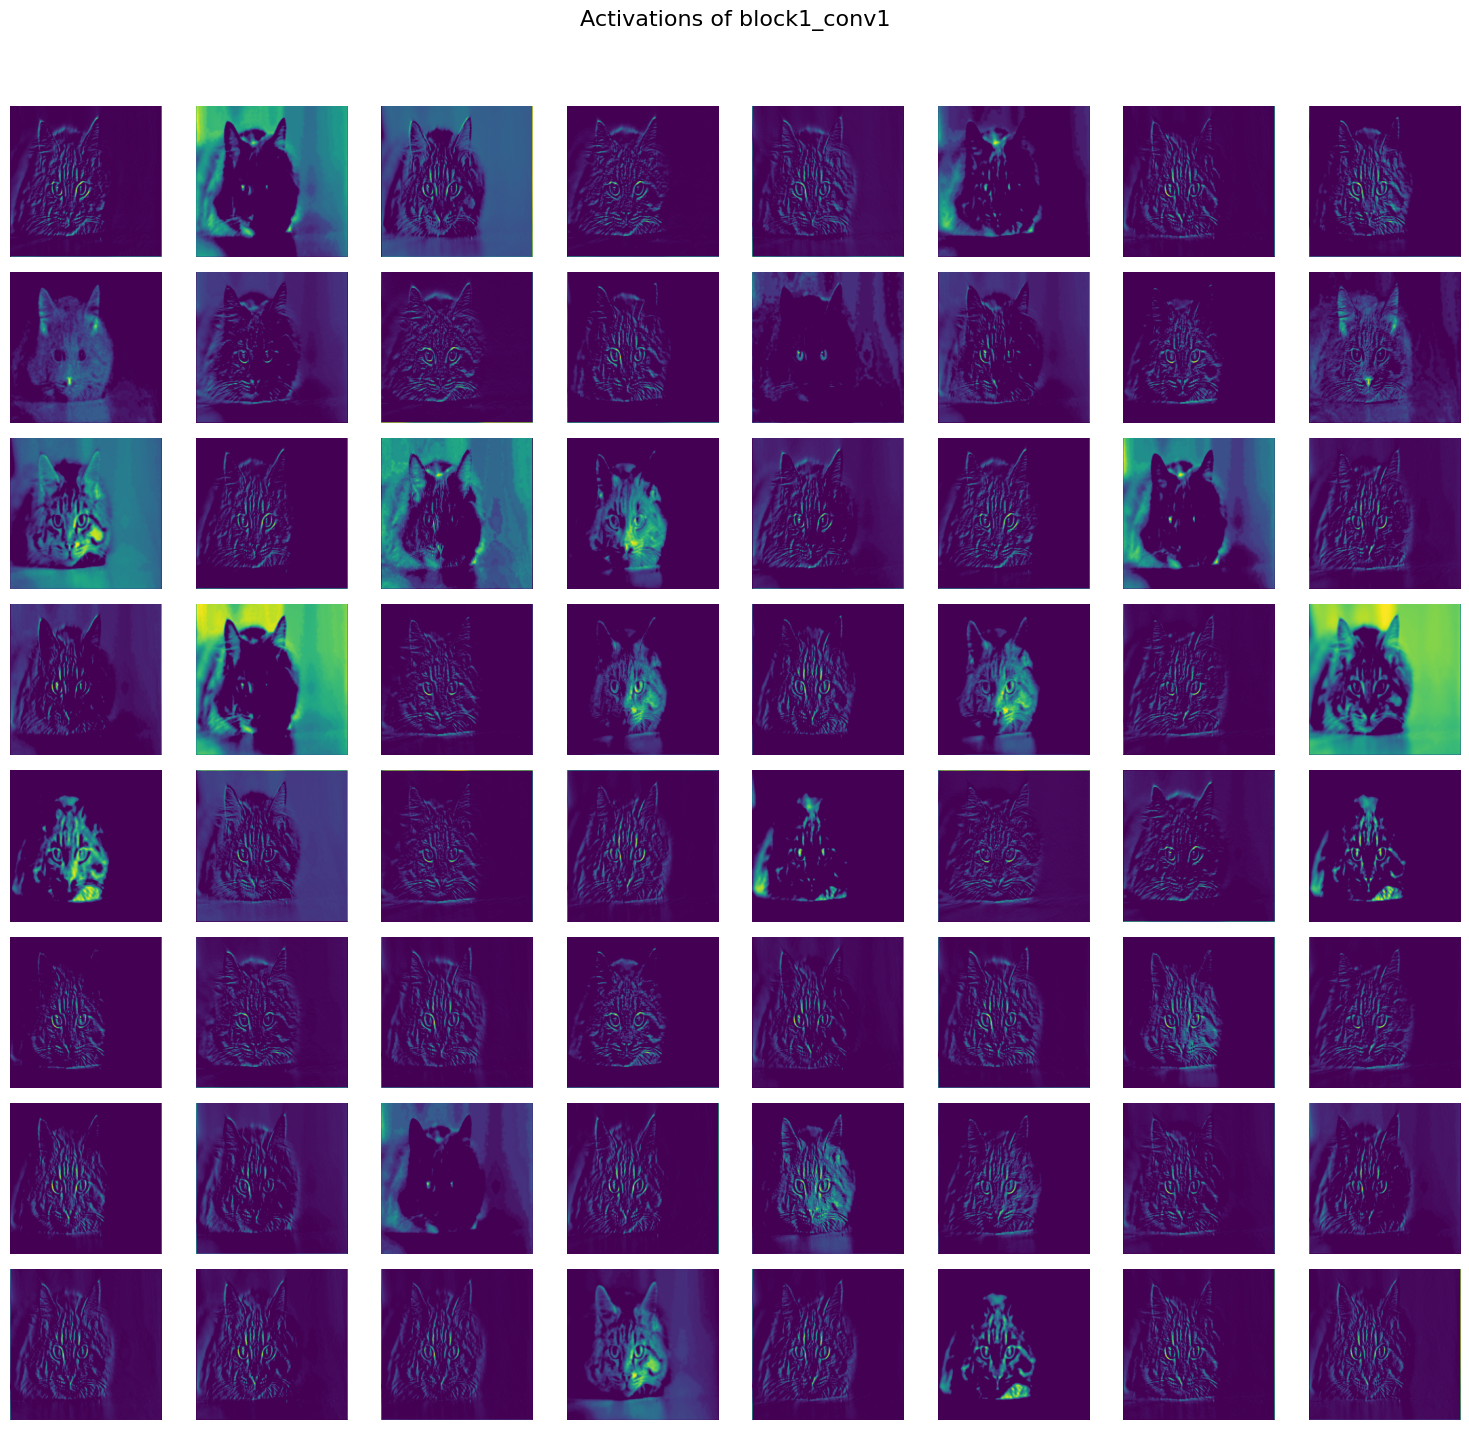

In [10]:
import matplotlib.pyplot as plt
import math

# 1. Select a convolutional layer
layer_name = 'block1_conv1'
layer_output = vgg16_model.get_layer(layer_name).output

# 2. Create a new Keras model for activations
activation_model = tf.keras.Model(inputs=vgg16_model.input, outputs=layer_output)

# 3. Get the activations
activations = activation_model.predict(preprocessed_image)

# Remove the batch dimension
activations = activations[0]

# 4. Determine the number of channels
num_channels = activations.shape[-1]
print(f"Number of channels in '{layer_name}' activations: {num_channels}")

# 5. Calculate grid dimensions for displaying a subset of channels
subset_size = 64  # Display the first 64 channels
grid_size = math.ceil(math.sqrt(subset_size))

# 6. Iterate through a subset of the channels and display them
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
fig.suptitle(f'Activations of {layer_name}', fontsize=16)

for i in range(subset_size):
    row = i // grid_size
    col = i % grid_size
    ax = axes[row, col]

    # 8. Display the activation map
    ax.imshow(activations[:, :, i], cmap='viridis')

    # 9. Turn off the axis
    ax.axis('off')

# 11. Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for the suptitle

# 12. Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The necessary libraries (TensorFlow, Keras, Matplotlib, NumPy) were already installed.
*   A custom VGG16 model was successfully implemented in Keras, allowing for architecture modifications via function parameters.
*   Pre-trained ImageNet weights for VGG16 were successfully loaded into the custom-built model.
*   The model's architecture was displayed, showing a total of approximately 138 million parameters.
*   A sample image was downloaded, resized to 224x224 pixels, converted to a NumPy array with a batch dimension, and preprocessed using the VGG16-specific `preprocess_input` function.
*   The VGG16 model successfully predicted the class probabilities for the preprocessed sample image.
*   The top 5 predicted classes and their probabilities for the sample image were successfully decoded and displayed.
*   Activations from the 'block5\_conv3' layer (which has 512 channels) were extracted for the sample image.
*   The activation maps for the first 64 channels of the 'block5\_conv3' layer were successfully visualized using Matplotlib.

### Insights or Next Steps

*   The process demonstrates a solid foundation for using pre-trained VGG16 for image classification and understanding intermediate layer activations.
*   A potential next step could be to explore fine-tuning the model on a custom dataset by modifying the top classification layers and training them on new data, leveraging the learned features from ImageNet.


## Visualize Input Channels

### Subtask:
Visualize the channels of the sample input image.

**Reasoning**:
Extract the individual color channels (Red, Green, Blue) from the preprocessed input image and display each channel as a grayscale image to visualize their intensity distributions.

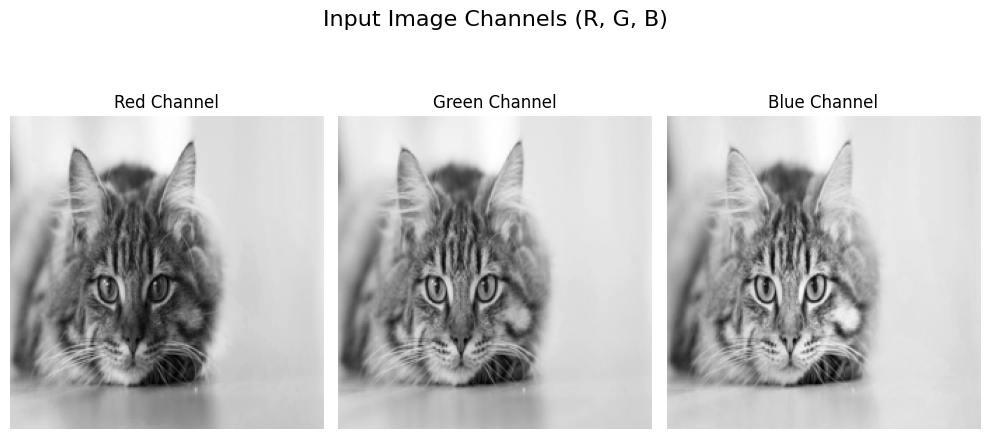

In [9]:
# Remove the batch dimension for visualization
input_image_channels = preprocessed_image[0]

# Display the channels
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Input Image Channels (R, G, B)', fontsize=16)

# Display Red channel
axes[0].imshow(input_image_channels[:, :, 0], cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

# Display Green channel
axes[1].imshow(input_image_channels[:, :, 1], cmap='gray')
axes[1].set_title('Green Channel')
axes[1].axis('off')

# Display Blue channel
axes[2].imshow(input_image_channels[:, :, 2], cmap='gray')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()